In [1]:
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import jax
import jax.numpy as jnp

import pandas_datareader as pdr

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
ETF_Symbols = [
    "VOO",
    "VTI",
    "VB",
    "USRT",
    "GBTC",
    "ETHE",
    "USO",
    "CPER",
    "VWO",
    #"DBMF",
    "BND",
    "BSV",
    "VTIP",
    "VTC",
    "BNDX",
    "IETC",
    "IEDI",
    "ITA",
    "IYM",
    "IYK",
    "IYC",
    "IYE",
    "IYF",
    "IYH",
    "IYJ",
    "IEZ",
    "ICF",
    "IYR",
    #"CCRV",
    "IAUF",
    "CMDY",
    "MUB",
    "QQQ",
]

In [3]:
ETF_Symbols = [
    "SPY",
    "IVV",
    "VOO",
    "VTI",
    "QQQ",
    "VTV",
    "VEA",
    "IEFA",
    "BND",
    "AGG",
    "VUG",
    "IJR",
    "VIG",
    "VWO",
    "IJH",
    "IWF",
    "IEMG",
    "IWD",
    "IWM",
    "GLD",
    "VO",
    "VYM",
    "BNDX",
    "VXUS",
    "EFA",
    "XLE",
    "VB",
    "VGT",
    "ITOT",
    "SCHD",
    "XLV",
    "XLK",
    "VCSH",
    "BSV",
    "VCIT",
    "LQD",
    "VNQ",
    "RSP",
    "XLF",
    "SCHX",
    "VEU",
    "SHY",
    "IVW",
    "USMV",
    "MUB",
    "DIA",
    "IWB",
    "BIL",
    "IWR",
    "SCHF",
    "IXUS",
    "TIP",
    "IAU",
    "VV",
    "SHV",
    "TLT",
    "IVE",
    "DGRO",
    "VBR",
    "JPST",
    "VT",
    "SDY",
    "MBB",
    "GOVT",
    "IEF",
    "IGSB",
    "DVY",
    "VTEB",
    "ESGU",
    "SCHB",
    "EEM",
    "VTIP",
    "IUSB",
    "MDY",
    "QUAL",
    "VGSH",
    "VHT",
    "XLP",
    "VOE",
    #"DFAC",
    "ACWI",
    "XLU",
    "XLY",
    "SCHP",
    "SPLG",
    "SCHG",
    "EFV",
    #"JEPI",
    "EMB",
    "PFF",
    "VMBS",
    "SCHA",
    "HYG",
    "VXF",
    "VGK",
    "SPYG",
    "SPYV",
    "IWS",
    "VGIT",
    "BIV",
    "AOA",
    "UUP",
    "VXX",
    "SH",
    "IETC",
    "IEDI",
    "ITA",
    "IYM",
    "IYK",
    "IYC",
    "IYE",
    "IYF",
    "IYH",
    "IYJ",
    "IEZ",
    "ICF",
    "IYR",
    "ETHE",
    "GBTC",
    "DBMF",
    "USO",
    "CPER",
    "IAUF",
    "CMDY",
]

In [3]:
Equity_Symbols = [
    #'BRZE',
    'AAPL',
    'SBUX',
    'AAL',
    'WMT',
    'AMZN',
    'TMDX',
    'XOM',
    'NFLX',
    'COIN',
    'VTNR',
    'SIGA',
]

In [4]:
data = dict()
for symbol in ETF_Symbols:
    reader = pdr.yahoo.daily.YahooDailyReader(symbol, 'Jun-14-2019', 'Sep-30-2022')
    data[symbol] = reader.read()

In [4]:
data = dict()
for symbol in Equity_Symbols:
    reader = pdr.yahoo.daily.YahooDailyReader(symbol, 'Sep-30-2021', 'Sep-30-2022')
    data[symbol] = reader.read()

### Create Initial Value

In [5]:
initials = dict()
for symbol in ETF_Symbols:
    initials[symbol] = data[symbol]['Close'].iloc[0]

### Compute log return for each symbol

In [5]:
def log_return(p1, p2):
    return math.log(p2 / p1)

In [6]:
returns = dict()
for symbol in ETF_Symbols:
    d = data[symbol]
    r = [log_return(p1, p2) for p1, p2 in zip(d['Close'].tolist()[:-2], d['Close'].tolist()[1:])] 
    returns[symbol] = r

In [7]:
for symbol in ETF_Symbols:
    if len(returns[symbol]) != 830:
        print("{}: {} does not have enough data".format(symbol, len(returns[symbol])))

In [6]:
returns = dict()
for symbol in Equity_Symbols:
    d = data[symbol]
    r = [log_return(p1, p2) for p1, p2 in zip(d['Close'].tolist()[:-2], d['Close'].tolist()[1:])] 
    returns[symbol] = r

### Compute mean and variance on returns

In [42]:
def expectation(rs):
    return sum(rs) / float(len(rs))

In [43]:
def variance(rs):
    mu = expectation(rs)
    return sum([(r - mu)**2 for r in rs]) / float(len(rs))

In [44]:
def std(rs):
    var = variance(rs)
    return math.sqrt(var)

In [45]:
mus = dict()
for symbol in ETF_Symbols:
    mus[symbol] = expectation(returns[symbol])

In [46]:
variances = dict()
for symbol in ETF_Symbols:
    variances[symbol] = variance(returns[symbol])

In [47]:
stds = dict()
for symbol in ETF_Symbols:
    stds[symbol] = std(returns[symbol])

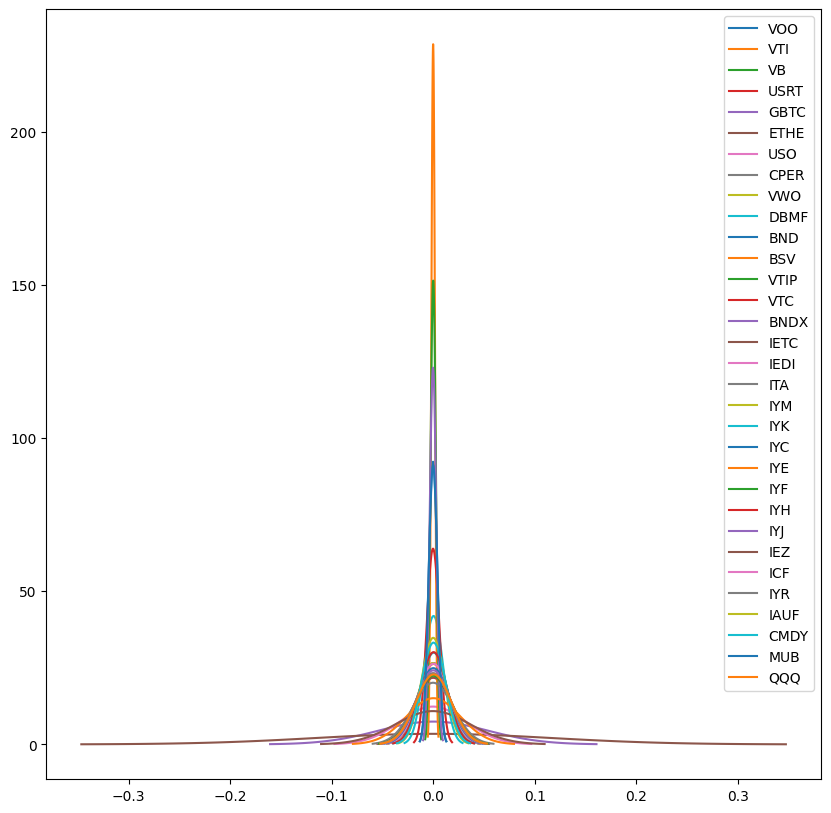

In [48]:
figure = plt.figure()
figure.set_figwidth(10)
figure.set_figheight(10)

for symbol in ETF_Symbols:
    x = np.linspace(mus[symbol] - 3. * stds[symbol], mus[symbol] + 3. * stds[symbol], 100)
    plt.plot(x, stats.norm.pdf(x, mus[symbol], stds[symbol]), label=symbol)
plt.legend()

### Example Single Security Return Simulation

In [49]:
def gaussian_sample(mu, std, initial, length):
    ss = np.random.normal(mu, std, length)
    prices = [initial]
    p1 = initial
    for s in ss:
        p2 = math.exp(s) * p1
        p1 = p2
        prices.append(p2)
    return prices

In [50]:
sample_price = gaussian_sample(mus['VOO'], stds['VOO'], initials['VOO'], len(returns['VOO']))

In [51]:
actual_price = data['VOO']['Close'].tolist()

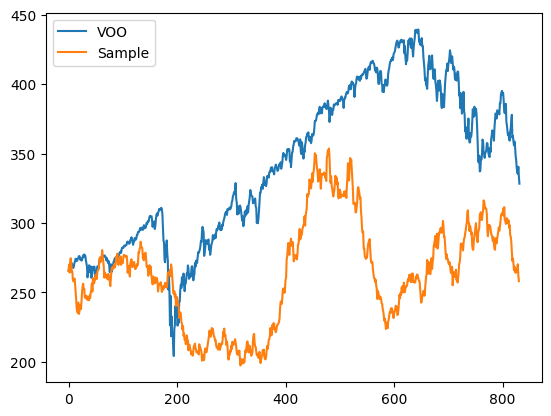

In [52]:
plt.plot(actual_price, label='VOO')
plt.plot(sample_price, label='Sample')
plt.legend()

### Compute Multivariate Gaussian

In [53]:
def covariance(rs1, rs2, mu1, mu2):
    covn = sum([(r1 - mu1) * (r2 - mu2) for r1, r2 in zip(rs1, rs2)])
    return covn / len(rs1)

In [54]:
def covariance_matrix():
    cov = []
    for i, symbol1 in enumerate(ETF_Symbols):
        row = [covariance(returns[symbol1], returns[symbol2], mus[symbol1], mus[symbol2]) for symbol2 in ETF_Symbols]
        cov.append(row)
    return np.array(cov)

In [55]:
covm = covariance_matrix()

In [56]:
meanv = np.array([mus[symbol] for symbol in ETF_Symbols])

In [57]:
initialv = [initials[symbol] for symbol in ETF_Symbols]

In [58]:
def multivariate_gaussian_sample(meanv, covm, initialv, length):
    ss = np.random.multivariate_normal(meanv, covm, length)
    prices = [np.array(initialv)]
    p1 = np.array(initialv)
    for i in range(length):
        p2 = np.exp(ss[i]) * p1
        p1 = p2
        prices.append(p1)
    return np.array(prices).transpose()

In [59]:
sample_price = multivariate_gaussian_sample(meanv, covm, initialv, len(returns['VOO']))

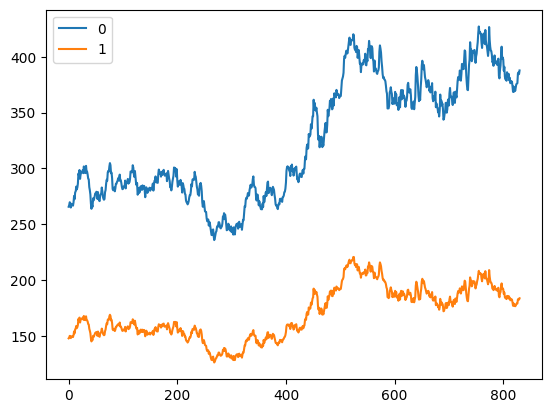

In [60]:
plt.plot(sample_price[0], label="0")
plt.plot(sample_price[1], label="1")
plt.legend()

### Portfolio Optimization using JAX

In [8]:
rs = np.array([np.array(returns[symbol], dtype=np.float32) for symbol in ETF_Symbols], dtype=np.float32)

In [8]:
rs = np.array([np.array(returns[symbol], dtype=np.float32) for symbol in Equity_Symbols], dtype=np.float32)

In [9]:
def expectation_and_cov(rs):
    mu = jnp.mean(rs, axis=1)
    cov = jnp.cov(rs)
    return (mu, cov)

In [10]:
def ret_and_vol(w, mu, cov, length):
    w = jax.nn.softmax(w)
    ret = jnp.dot(w.T, mu) * length
    vol = jnp.sqrt(jnp.dot(w.T, jnp.dot(cov * length, w)))
    return (ret, vol)

In [11]:
def sharpe(ret, vol):
    return ret / vol

In [12]:
def sharpe_loss(w, rs):
    mu, cov = expectation_and_cov(rs)
    ret, vol = ret_and_vol(w, mu, cov, rs.shape[1])
    s = sharpe(ret, vol)
    return -s

In [13]:
d_sharpe_loss_wrt_w = jax.jit(jax.grad(sharpe_loss, argnums=0))

In [14]:
w = np.random.rand(rs.shape[0])
w = jax.nn.softmax(w)

In [15]:
lr = 1.0
for step in range(500):
    w_grad = d_sharpe_loss_wrt_w(w, rs)
    w -= lr * w_grad
    if step % 10 == 0:
        #print("w_grad: {}".format(w_grad))
        print("step {}: {}".format(step, -sharpe_loss(w, rs)))

step 0: 0.15226928889751434
step 10: 0.18747130036354065
step 20: 0.21611320972442627
step 30: 0.24179990589618683
step 40: 0.26602861285209656
step 50: 0.2896575331687927
step 60: 0.3133215010166168
step 70: 0.33760303258895874
step 80: 0.36314499378204346
step 90: 0.3907662630081177
step 100: 0.4216429591178894
step 110: 0.45763182640075684
step 120: 0.5018623471260071
step 130: 0.5594649314880371
step 140: 0.6355269551277161
step 150: 0.7208833694458008
step 160: 0.7884743809700012
step 170: 0.8356316089630127
step 180: 0.8835063576698303
step 190: 0.9448474645614624
step 200: 0.9891658425331116
step 210: 1.0092846155166626
step 220: 1.0189682245254517
step 230: 1.0244122743606567
step 240: 1.0278557538986206
step 250: 1.0302212238311768
step 260: 1.0319457054138184
step 270: 1.0332603454589844
step 280: 1.0342974662780762
step 290: 1.0351381301879883
step 300: 1.0358357429504395
step 310: 1.036425232887268
step 320: 1.0369316339492798
step 330: 1.0373729467391968
step 340: 1.037762

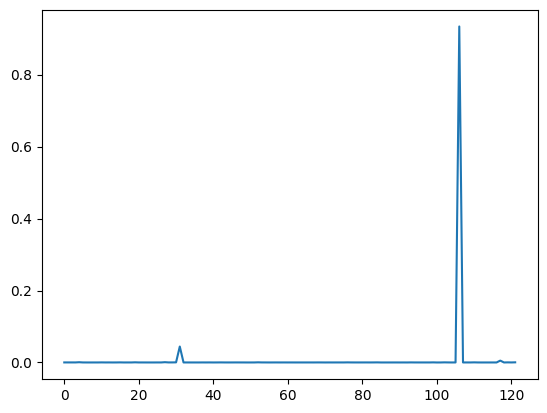

In [16]:
plt.plot(jax.nn.softmax(w))

In [17]:
sharpe_loss(w, rs) * -1.

DeviceArray(1.0411954, dtype=float32)

In [18]:
w = jax.nn.softmax(w)
for i, symbol in enumerate(ETF_Symbols):
    print("{}: {}".format(symbol, w[i]))

SPY: 0.00016804671031422913
IVV: 0.00016355558182112873
VOO: 0.00016741757281124592
VTI: 0.00015157782763708383
QQQ: 0.0007209328468888998
VTV: 0.0001193065763800405
VEA: 6.551465776283294e-05
IEFA: 6.228940037544817e-05
BND: 8.343147055711597e-05
AGG: 8.549817721359432e-05
VUG: 0.00023617410624865443
IJR: 0.00011061585246352479
VIG: 0.00014902872499078512
VWO: 6.666852277703583e-05
IJH: 0.00011160766734974459
IWF: 0.00027701223734766245
IEMG: 6.241325900191441e-05
IWD: 0.00010164669220102951
IWM: 9.342964040115476e-05
GLD: 0.0004614016506820917
VO: 0.00011405133409425616
VYM: 0.00011100431584054604
BNDX: 7.696644752286375e-05
VXUS: 6.535297870868817e-05
EFA: 6.167965329950675e-05
XLE: 0.00011592552618822083
VB: 0.0001021585485432297
VGT: 0.0008337023318745196
ITOT: 0.0001478172343922779
SCHD: 0.0002021838736254722
XLV: 0.0003696235944516957
XLK: 0.04435009881854057
VCSH: 9.922436584020033e-05
BSV: 0.0001043965166900307
VCIT: 7.862861821195111e-05
LQD: 7.475732854800299e-05
VNQ: 6.1388

### Instead of using original return, we can do sample based on the multivariate gaussian, so we can incorporate more tickers that may not have the same age